In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sm
from statsmodels.graphics.gofplots import qqplot

In [3]:
df = pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

<Axes: xlabel='datetime', ylabel='count'>

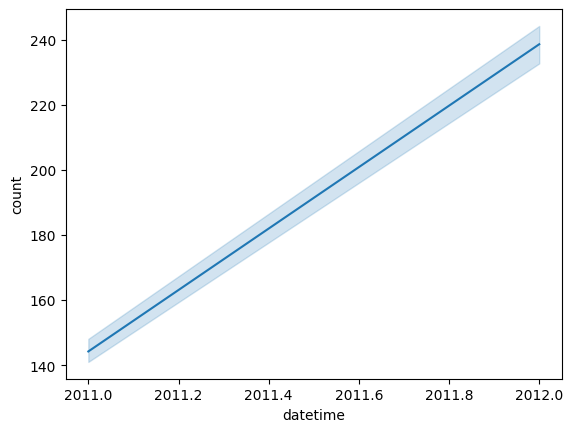

In [102]:
sns.lineplot(data=df, x = df['datetime'].dt.year, y = 'count')

<Axes: xlabel='temp', ylabel='count'>

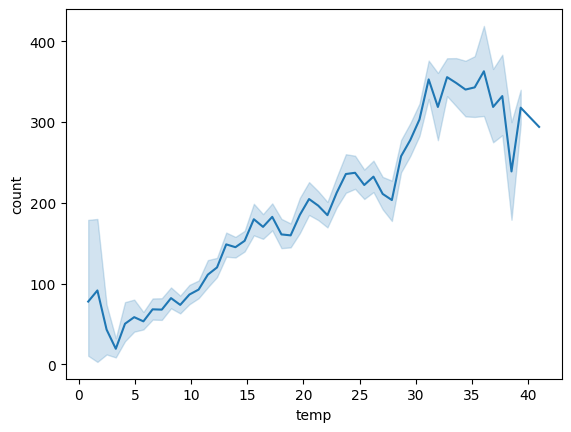

In [101]:
sns.lineplot(data=df, x = 'temp', y = 'count')

<Axes: xlabel='humidity', ylabel='count'>

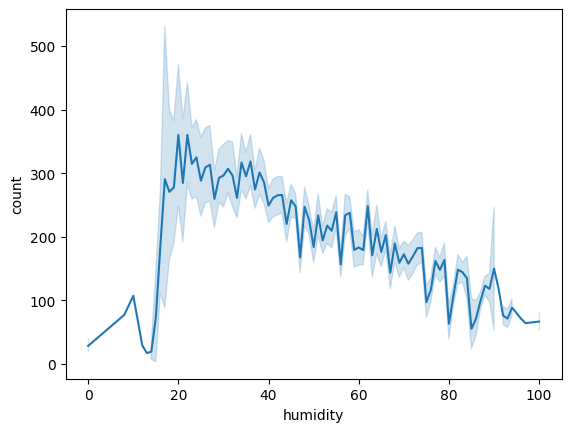

In [103]:
sns.lineplot(data=df, x = 'humidity', y = 'count')

<Axes: xlabel='windspeed', ylabel='count'>

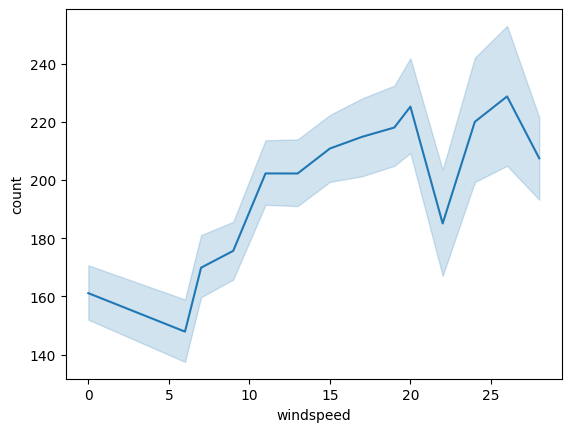

In [104]:
sns.lineplot(data=df, x = 'windspeed', y = 'count')

In [10]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Numeric and Categorical Columns visual analysis

In [11]:
def numeric_visual(columns): 
    plt.figure(figsize=(15,15))
    i = 1
    for column in columns:
        plt.subplot(4,2,i)
        sns.histplot(data = df, x = column)
        plt.title(f'Visual Analysis for {column}')
        i = i + 1
    plt.tight_layout()
    plt.show()

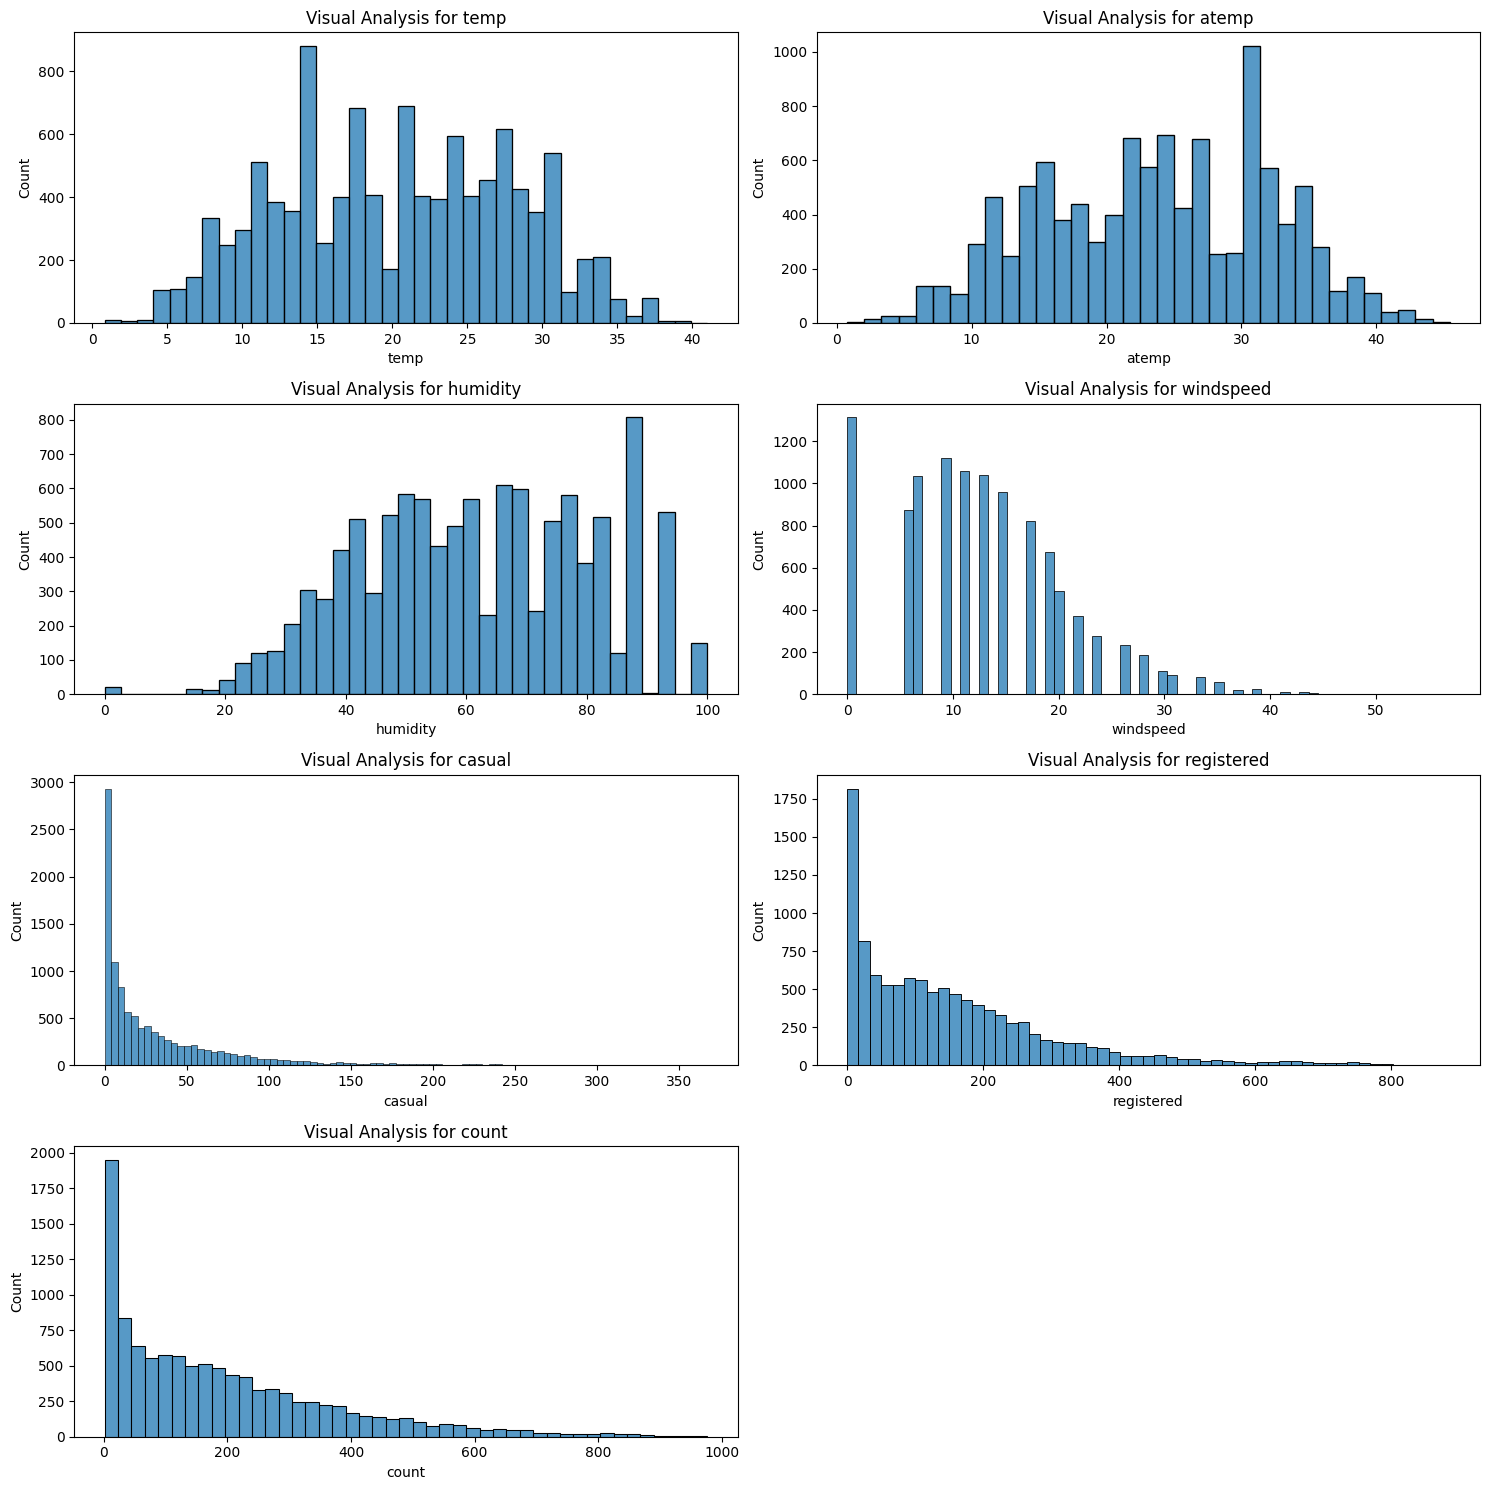

In [12]:
numeric_visual(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'])

In [13]:
def categorical_visual(columns): 
    plt.figure(figsize=(15,15))
    i = 1
    for column in columns:
        plt.subplot(4,2,i)
        sns.countplot(data = df, x = column)
        plt.title(f'Visual Analysis for {column}')
        i = i + 1
    plt.tight_layout()
    plt.show()

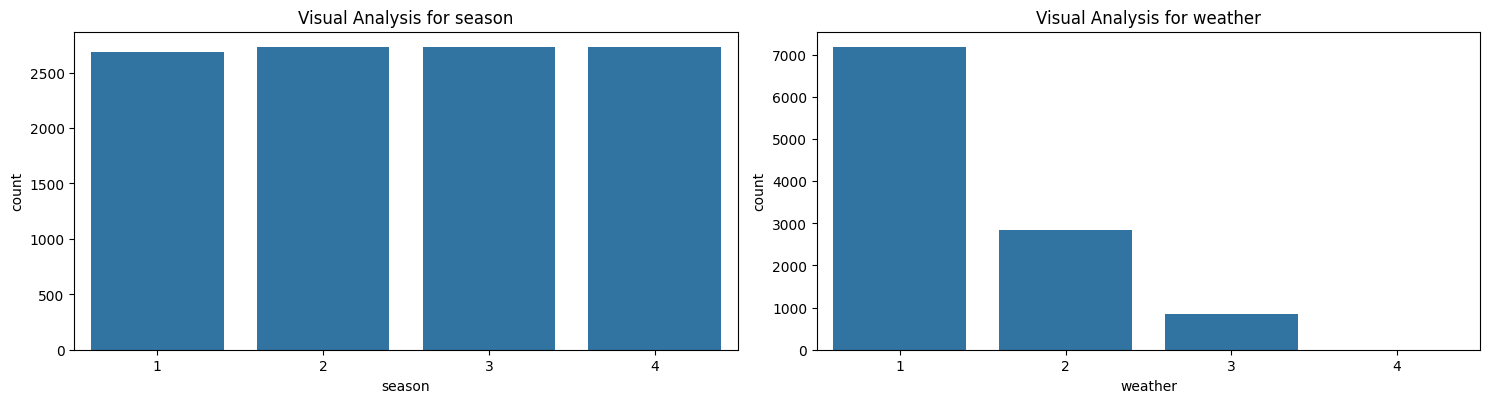

In [14]:
categorical_visual(['season', 'weather'])

# Outlier Treatment

In [15]:
def outlier_visual(columns): 
    plt.figure(figsize=(15,15))
    i = 1
    for column in columns:
        plt.subplot(4,2,i)
        sns.boxplot(data = df, x = column)
        plt.title(f'Outlier Analysis for {column}')
        i = i + 1
    plt.tight_layout()
    plt.show()

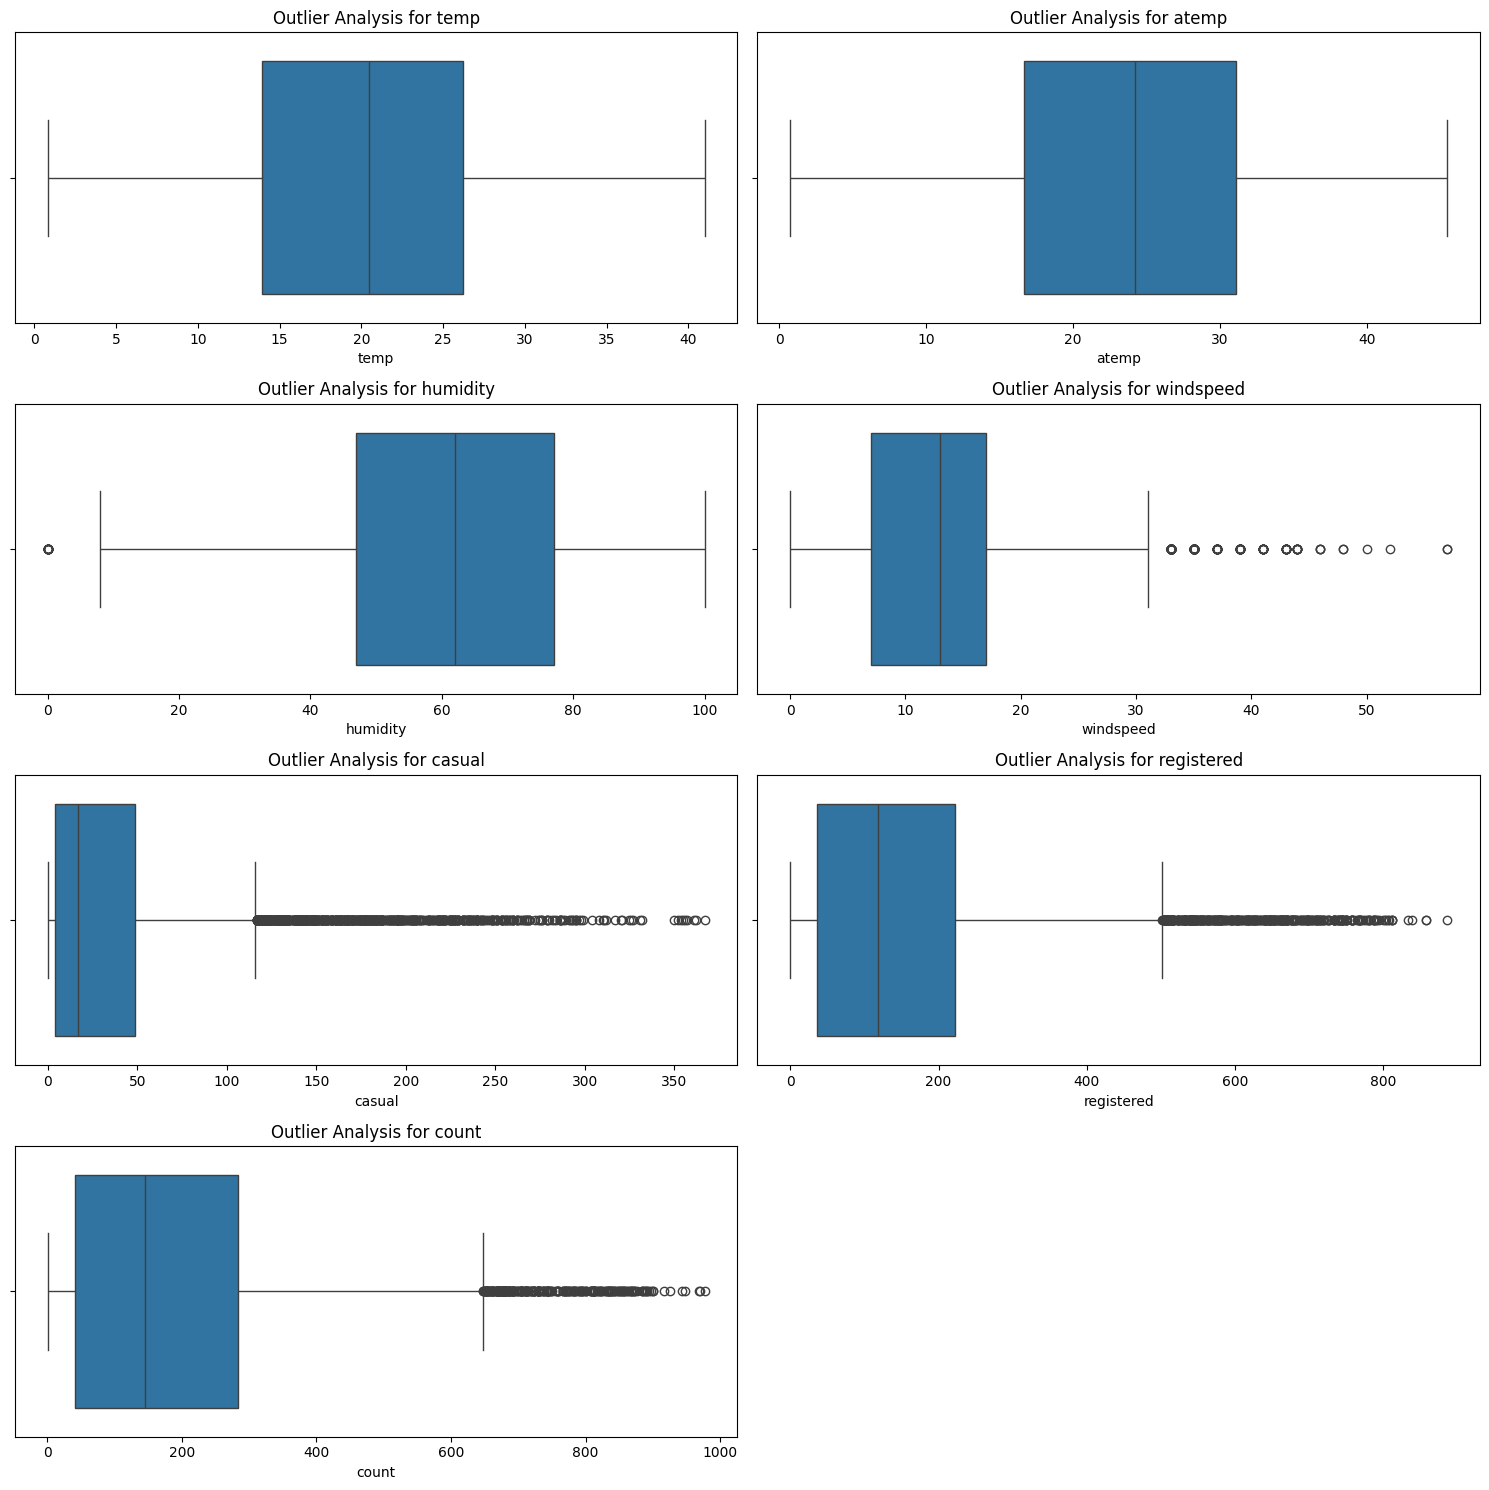

In [16]:
outlier_visual(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'])

In [17]:
def data_clipping(dataframe, column):    
    percentile_5 = np.quantile(dataframe[column], 0.05)
    percentile_95 = np.quantile(dataframe[column], 0.95)
    clipped_data = np.clip(dataframe[column], percentile_5, percentile_95)
    return clipped_data

In [18]:
df['windspeed'] = data_clipping(df,'windspeed')

<Axes: xlabel='windspeed'>

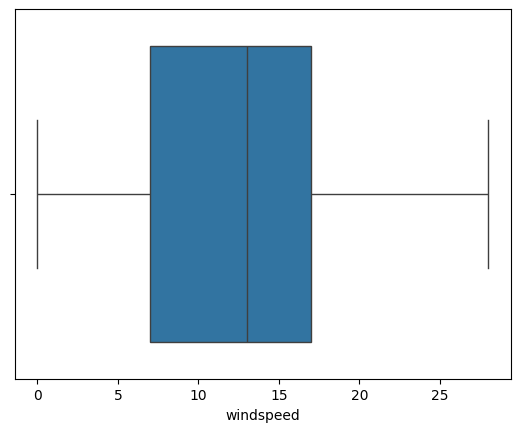

In [19]:
sns.boxplot(data=df, x = 'windspeed')

In [20]:
for i in df['season'].unique():
    season_df = df.loc[df['season'] == i].reset_index()
    Q1 = np.percentile(season_df['count'], 25)
    Q3 = np.percentile(season_df['count'], 75)

    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = np.round(len(season_df.loc[(season_df['count'] > upper_bound) | (season_df['count'] < lower_bound)])/len(season_df)*100, 2)

    print('Season - ', i , "25th Percentile = " , Q1, "75th Percentile = " , Q3, 'IQR = ', IQR, 'upper_bound = ', upper_bound, 'lower_bound = ', lower_bound, 'Outlier Percent = ', outliers)

Season -  1 25th Percentile =  24.0 75th Percentile =  164.0 IQR =  140.0 upper_bound =  374.0 lower_bound =  -186.0 Outlier Percent =  5.17
Season -  2 25th Percentile =  49.0 75th Percentile =  321.0 IQR =  272.0 upper_bound =  729.0 lower_bound =  -359.0 Outlier Percent =  1.54
Season -  3 25th Percentile =  68.0 75th Percentile =  347.0 IQR =  279.0 upper_bound =  765.5 lower_bound =  -350.5 Outlier Percent =  2.23
Season -  4 25th Percentile =  51.0 75th Percentile =  294.0 IQR =  243.0 upper_bound =  658.5 lower_bound =  -313.5 Outlier Percent =  2.34


In [21]:
for i in df['workingday'].unique():
    wd_df = df.loc[df['workingday'] == i].reset_index()
    Q1 = np.percentile(wd_df['count'], 25)
    Q3 = np.percentile(wd_df['count'], 75)

    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = np.round(len(wd_df.loc[(wd_df['count'] > upper_bound) | (wd_df['count'] < lower_bound)])/len(wd_df)*100, 2)

    print('Working Day - ', i , "25th Percentile = " , Q1, "75th Percentile = " , Q3, 'IQR = ', IQR, 'upper_bound = ', upper_bound, 'lower_bound = ', lower_bound, 'Outlier Percent = ', outliers)

Working Day -  0 25th Percentile =  44.0 75th Percentile =  304.0 IQR =  260.0 upper_bound =  694.0 lower_bound =  -346.0 Outlier Percent =  0.46
Working Day -  1 25th Percentile =  41.0 75th Percentile =  277.0 IQR =  236.0 upper_bound =  631.0 lower_bound =  -313.0 Outlier Percent =  3.75


In [22]:
for i in df['holiday'].unique():
    hd_df = df.loc[df['holiday'] == i].reset_index()
    Q1 = np.percentile(hd_df['count'], 25)
    Q3 = np.percentile(hd_df['count'], 75)

    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = np.round(len(hd_df.loc[(hd_df['count'] > upper_bound) | (hd_df['count'] < lower_bound)])/len(hd_df)*100, 2)

    print('Working Day - ', i , "25th Percentile = " , Q1, "75th Percentile = " , Q3, 'IQR = ', IQR, 'upper_bound = ', upper_bound, 'lower_bound = ', lower_bound, 'Outlier Percent = ', outliers)

Working Day -  0 25th Percentile =  43.0 75th Percentile =  283.0 IQR =  240.0 upper_bound =  643.0 lower_bound =  -317.0 Outlier Percent =  2.94
Working Day -  1 25th Percentile =  38.5 75th Percentile =  308.0 IQR =  269.5 upper_bound =  712.25 lower_bound =  -365.75 Outlier Percent =  0.0


# Correlation Heatmap

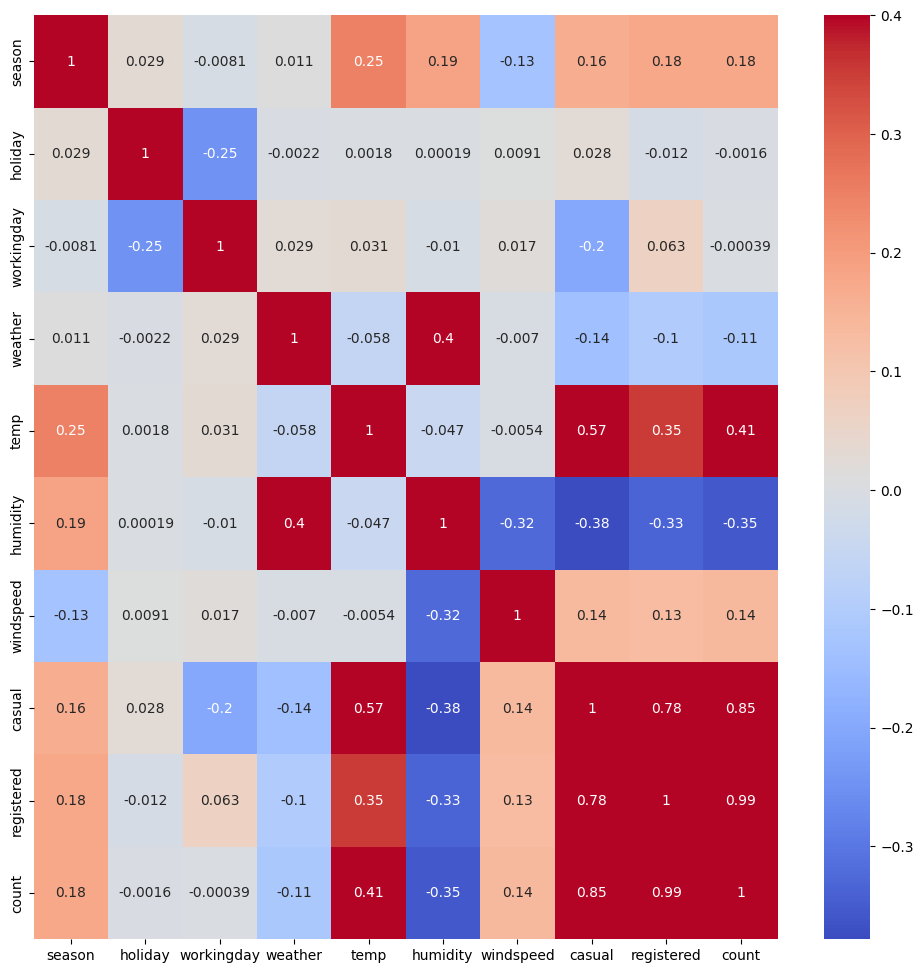

In [105]:
plt.figure(figsize=(12,12))
sns.heatmap(df.select_dtypes(np.number).corr(method='spearman'), vmax=0.4, annot=True, cmap='coolwarm')
plt.show()

In [24]:
#Removing the atemp column as it is 0.98 correlated to temp
df.drop(columns=['atemp'],inplace=True)

# Difference between Bike Rides on Weekdays and Weekends

## Analysis for registered users

In [84]:
wd_df = df[df['workingday'] == 1]
hd_df = df[df['workingday'] == 0]

In [85]:
# H0 : There is no significant difference between the count of registered users rides on Weekdays and the count of registered users rides on Weekends
# Ha : There is statiscally significant difference between the count of registered users rides on Weekdays and the count of registered users rides on Weekends


# Signifance level / Alpha : 0.05 / 95%
alpha = 0.05

In [86]:
t_stat, p_value = stats.ttest_ind(wd_df['registered'], hd_df['registered'])
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: 12.552707000266874
p-value: 6.806493719916074e-36


In [87]:
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference between the count of registered users rides on Weekdays and the count of registered users rides on Weekends.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference between the count of registered users rides on Weekdays and the count of registered users rides on Weekends.')

Reject the null hypothesis. There is a significant difference between the count of registered users rides on Weekdays and the count of registered users rides on Weekends.


<Axes: xlabel='workingday', ylabel='registered'>

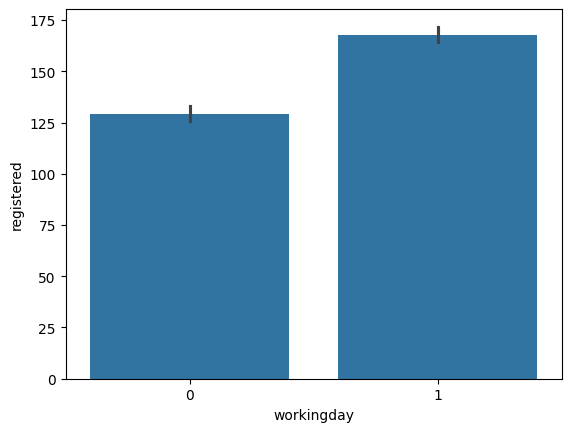

In [89]:
sns.barplot(df, x = 'workingday', y = 'registered')

## Analysis fof casual users

In [90]:
# H0 : There is no significant difference between the casual users of rides on Weekdays and the casual users of rides on Weekends
# Ha : There is statiscally significant difference between the casual users of rides on Weekdays and the casual users of rides on Weekends


# Signifance level / Alpha : 0.05 / 95%
alpha = 0.05

In [91]:
t_stat, p_value = stats.ttest_ind(wd_df['casual'], hd_df['casual'])
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: -35.12830185964087
p-value: 3.5619674236054405e-256


In [92]:
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference between the casual users of rides on Weekdays and the casual users of rides on Weekends.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference between the casual users of rides on Weekdays and the casual users of rides on Weekends.')

Reject the null hypothesis. There is a significant difference between the casual users of rides on Weekdays and the casual users of rides on Weekends.


<Axes: xlabel='workingday', ylabel='casual'>

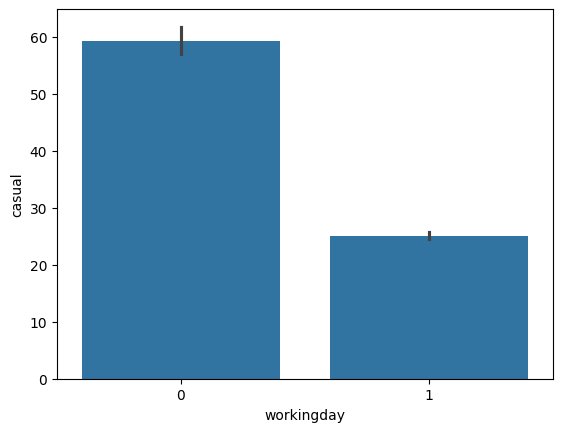

In [93]:
sns.barplot(df, x = 'workingday', y = 'casual')

# Demand for bicycles on different Weather Conditions

In [29]:
# H0 : There is no significant difference between the count of rides for different weather conditions
# Ha : There is statiscally significant difference between the count of rides for different weather conditions


# Signifance level / Alpha : 0.05 / 95%
alpha = 0.05

In [30]:
# The samples collected are independent of each other groups

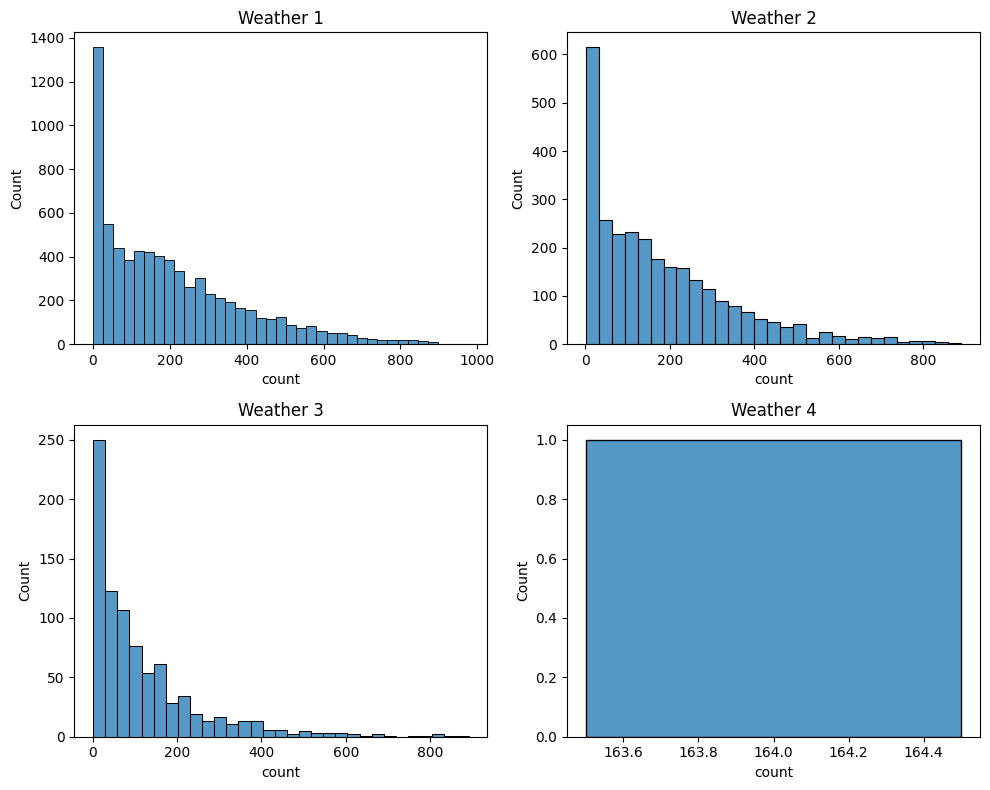

In [31]:
# Checking data normality
plt.figure(figsize=(10,8))
for i in df['weather'].unique():
    wt_df = df[df['weather'] == i]
    plt.subplot(2,2,i)
    sns.histplot(data=wt_df, x = 'count')
    plt.title(f'Weather {i}')
plt.tight_layout()
plt.show()

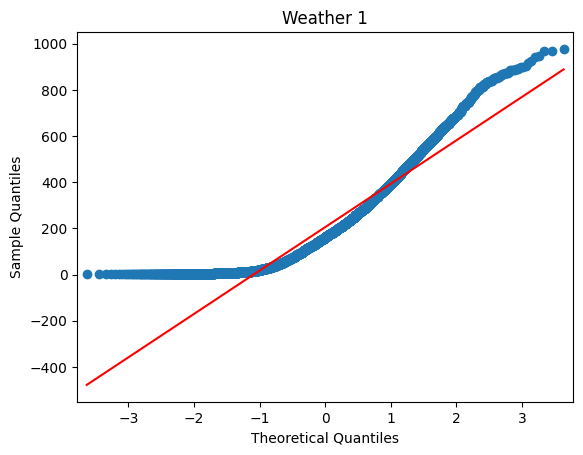

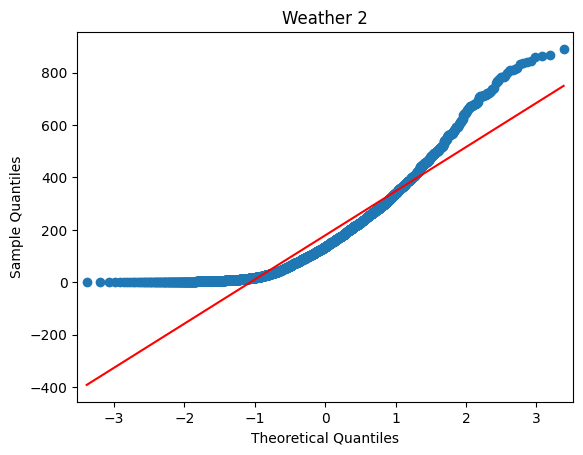

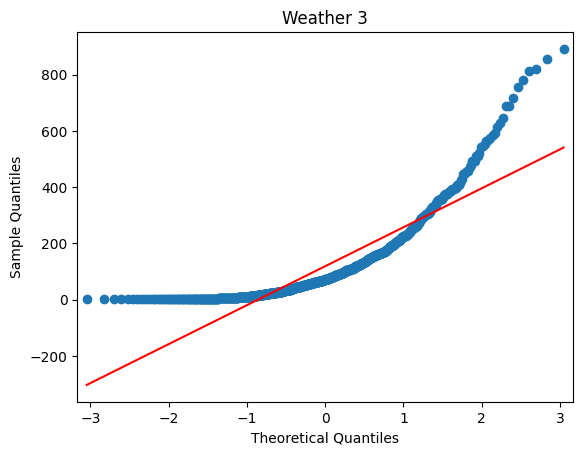

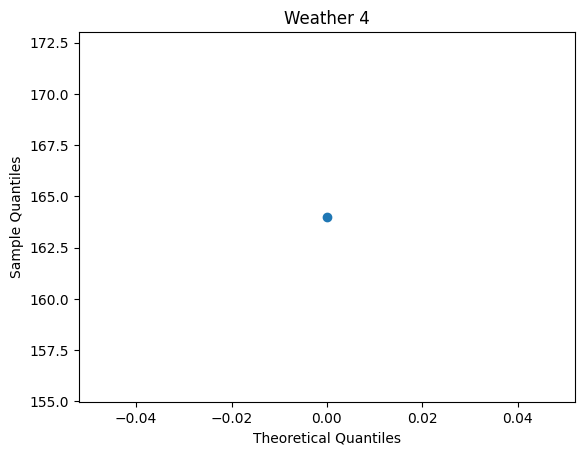

In [32]:
for i in df['weather'].unique():
    wt_df = df[df['weather'] == i]
    qqplot(data=wt_df['count'], line='s')
    plt.title(f'Weather {i}')
    plt.show()

In [33]:
#Skewness
df.skew(numeric_only=True)

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
humidity     -0.086335
windspeed     0.191537
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

In [34]:
#Kurtosis
df.kurt(numeric_only=True)

season        -1.355661
holiday       30.046975
workingday    -1.397828
weather        0.395533
temp          -0.914530
humidity      -0.759818
windspeed     -0.557880
casual         7.551629
registered     2.626081
count          1.300093
dtype: float64

In [35]:
# Shapiro test for normality
for i in df['weather'].unique():
    wt_df = df[df['weather'] == i]
    if len(wt_df) < 50:
        # Sample size is less than 50
        continue
    test_stat , pvalue = stats.shapiro(wt_df['count'])
    print('test-statistic:', test_stat)
    print('p-value:', p_value)
    if p_value < 0.05:
        print("Reject H0")
        print("Data is not Gaussian")
    else:
        print("Fail to reject H0")
        print("Data is Gaussian")

test-statistic: 0.8909259459740138
p-value: 0.22644804226361348
Fail to reject H0
Data is Gaussian
test-statistic: 0.8767694973495206
p-value: 0.22644804226361348
Fail to reject H0
Data is Gaussian
test-statistic: 0.7674327906035717
p-value: 0.22644804226361348
Fail to reject H0
Data is Gaussian


c:\Users\Saurabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


In [36]:
# Levene test for variance
wt1 = df[df['weather'] == 1]
wt2 = df[df['weather'] == 2]
wt3 = df[df['weather'] == 3]
wt4 = df[df['weather'] == 4]

test_stat, p_value = stats.levene(wt1['count'], wt2['count'], wt3['count'], wt4['count'])
print('test-statistic:', test_stat)
print('p-value:', p_value)
    
if p_value < 0.05:
    print("Reject H0")
    print("Not Equal Variance")
else:
    print("Fail to reject H0")
    print("Equal Variance")

test-statistic: 54.85106195954556
p-value: 3.504937946833238e-35
Reject H0
Not Equal Variance


## As 2 of the 3 ANOVA assumptions fail we go ahead with the KS-Test

In [37]:
ks_stat, p_value = stats.kstest(wt1['count'], wt2['count'], wt3['count'], wt4['count'])
print('ANOVA-stat:',ks_stat)
print('p-value:', p_value)

ANOVA-stat: 0.06282082027941342
p-value: 2.0232588507344455e-07


In [38]:
if p_value > alpha:
    print('Fail to reject the null hypothesis. There is no significant difference between the count of rides for different weather conditions.')
else:
    print('Reject the null hypothesis. There is a significant difference between the count of rides for different weather conditions.')

Reject the null hypothesis. There is a significant difference between the count of rides for different weather conditions.


In [56]:
def encode_weather_conditions(cond):
    if cond == 1:
        return 'Clear'
    elif cond == 2:
        return 'Mist'
    elif cond == 3:
        return 'Light Rain'
    elif cond == 4:
        return 'Heavy Rain'

df['weather_conditions'] = df['weather'].apply(encode_weather_conditions)

df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,season_label,weather_conditions
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13,spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1,spring,Clear


<Axes: xlabel='weather_conditions', ylabel='count'>

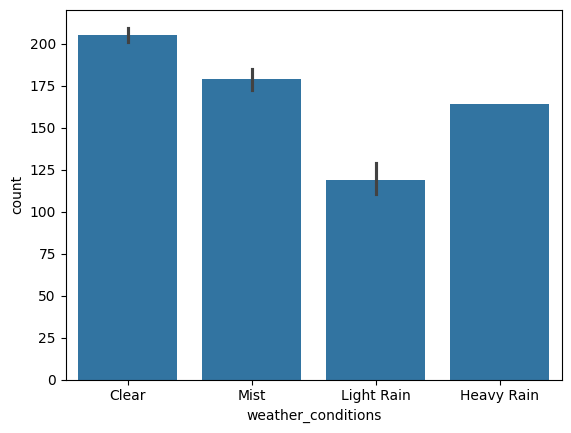

In [109]:
sns.barplot(df, x = 'weather_conditions', y = 'count')

# Demand for bicycles on different Seasons

In [95]:
# H0 : There is no significant difference between the count of rides for different seasons
# Ha : There is statiscally significant difference between the count of rides for different seasons


# Signifance level / Alpha : 0.05 / 95%
alpha = 0.05

In [96]:
# The samples collected are independent of each other groups

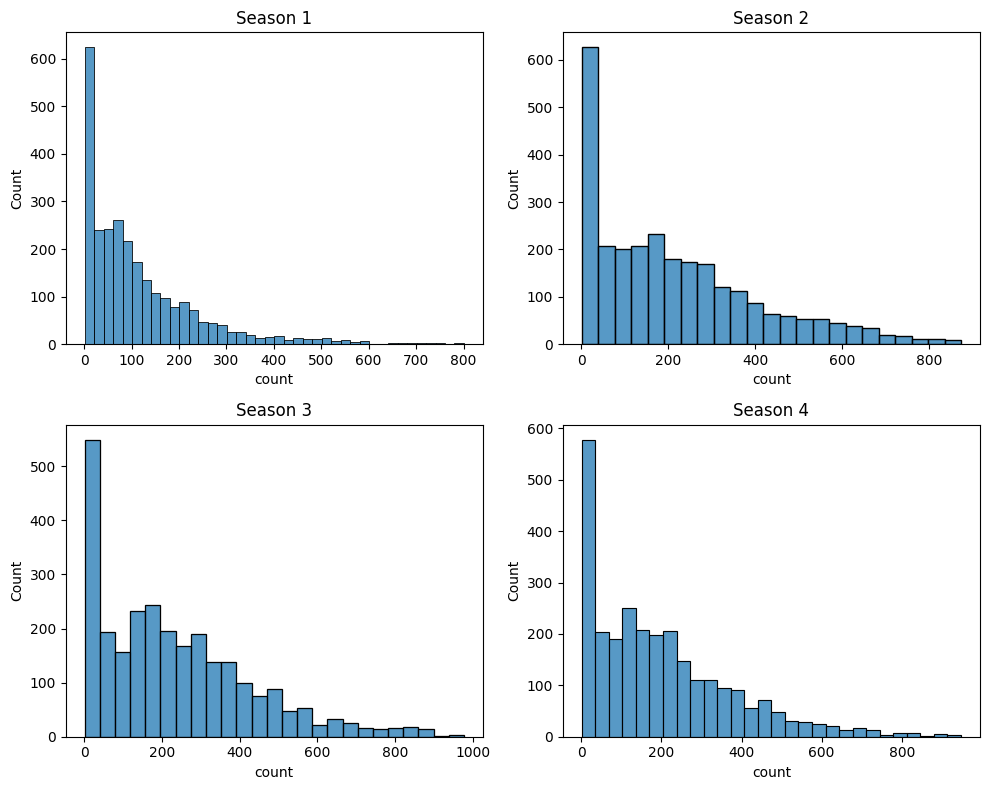

In [97]:
# Checking data normality
plt.figure(figsize=(10,8))
for i in df['season'].unique():
    wt_df = df[df['season'] == i]
    plt.subplot(2,2,i)
    sns.histplot(data=wt_df, x = 'count')
    plt.title(f'Season {i}')
plt.tight_layout()
plt.show()

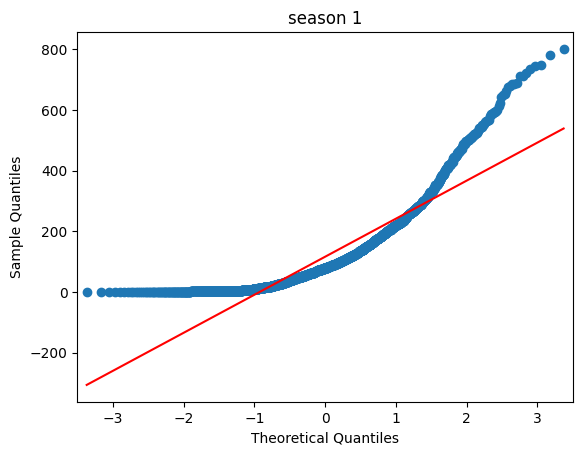

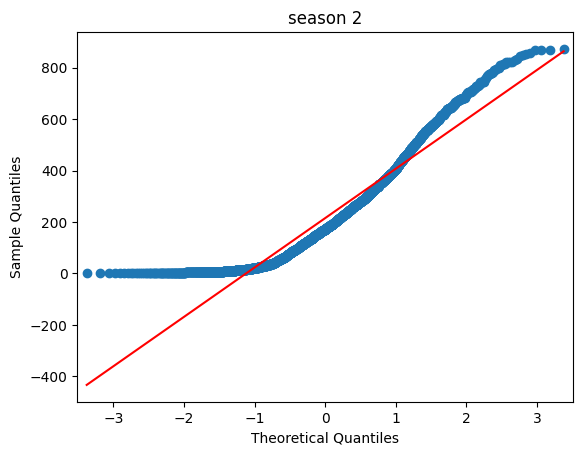

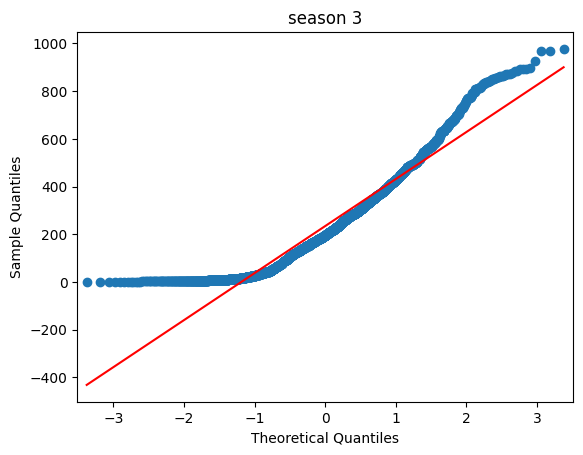

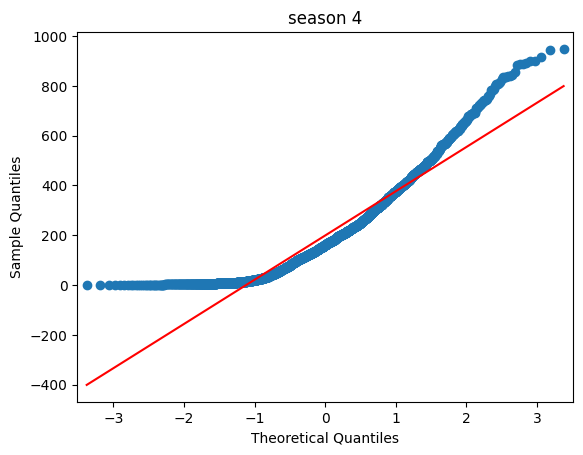

In [42]:
for i in df['season'].unique():
    wt_df = df[df['season'] == i]
    qqplot(data=wt_df['count'], line='s')
    plt.title(f'season {i}')
    plt.show()

In [43]:
# Shapiro test for normality
for i in df['season'].unique():
    ss_df = df[df['season'] == i]
    if len(ss_df) < 50:
        # Sample size is less than 50
        continue
    test_stat , pvalue = stats.shapiro(ss_df['count'])
    print('test-statistic:', test_stat)
    print('p-value:', p_value)
    if p_value < 0.05:
        print("Reject H0")
        print("Data is not Gaussian")
    else:
        print("Fail to reject H0")
        print("Data is Gaussian")

test-statistic: 0.8087378401253588
p-value: 2.0232588507344455e-07
Reject H0
Data is not Gaussian
test-statistic: 0.9004818080893252
p-value: 2.0232588507344455e-07
Reject H0
Data is not Gaussian
test-statistic: 0.9148166372899196
p-value: 2.0232588507344455e-07
Reject H0
Data is not Gaussian
test-statistic: 0.8954637482095505
p-value: 2.0232588507344455e-07
Reject H0
Data is not Gaussian


In [44]:
# Levene test for variance
ss1 = df[df['season'] == 1]
ss2 = df[df['season'] == 2]
ss3 = df[df['season'] == 3]
ss4 = df[df['season'] == 4]

test_stat, p_value = stats.levene(ss1['count'], ss2['count'], ss3['count'], ss4['count'])
print('test-statistic:', test_stat)
print('p-value:', p_value)
    
if p_value < 0.05:
    print("Reject H0")
    print("Not Equal Variance")
else:
    print("Fail to reject H0")
    print("Equal Variance")

test-statistic: 187.7706624026276
p-value: 1.0147116860043298e-118
Reject H0
Not Equal Variance


## As 2 of the 3 ANOVA assumptions fail we go ahead with the KS-Test

In [45]:
ks_stat, p_value = stats.kstest(ss1['count'], ss2['count'], ss3['count'], ss4['count'])
print('ANOVA-stat:',ks_stat)
print('p-value:', p_value)

ANOVA-stat: 0.27401258548410956
p-value: 5.229818428809134e-90


In [46]:
if p_value > alpha:
    print('Fail to reject the null hypothesis. There is no significant difference between the count of rides for different seasons.')
else:
    print('Reject the null hypothesis. There is a significant difference between the count of rides for different seasons.')

Reject the null hypothesis. There is a significant difference between the count of rides for different seasons.


In [48]:
def encode_seasons(cond):
    if cond == 1:
        return 'spring'
    elif cond == 2:
        return 'summer'
    elif cond == 3:
        return 'fall'
    elif cond == 4:
        return 'winter'

df['season_label'] = df['season'].apply(encode_seasons)

df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,season_label
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1,spring


<Axes: xlabel='season_label', ylabel='count'>

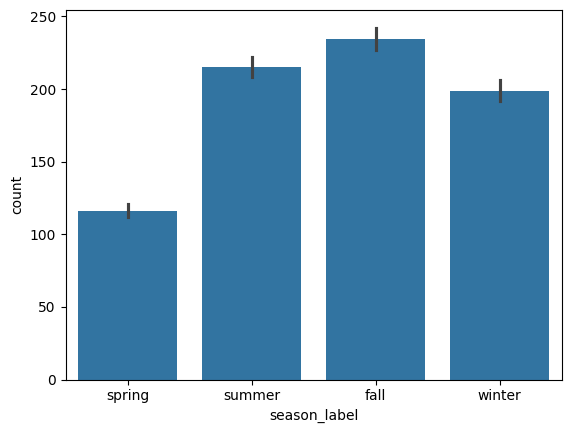

In [49]:
sns.barplot(df, x = 'season_label', y = 'count')

# Check if the Weather conditions are significantly different during different Seasons?

In [50]:
# H0 : Weather conditions and seasons are independent
# Ha : Weather conditions and seasons are dependent


# Signifance level / Alpha : 0.05 / 95%
alpha = 0.05

In [106]:
crosstab = pd.crosstab(index=df['weather_conditions'], columns=df['season_label'])
crosstab

season_label,fall,spring,summer,winter
weather_conditions,,,,
Clear,1930,1759,1801,1702
Heavy Rain,0,1,0,0
Light Rain,199,211,224,225
Mist,604,715,708,807


In [107]:
chi_stat, p_value, dof, exp_freq = stats.chi2_contingency(crosstab)
print('Chi square statistic', chi_stat)
print('P_value', p_value)

Chi square statistic 49.15865559689363
P_value 1.5499250736864862e-07


In [108]:
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant association between weather conditions and seasons.')
else:
    print('Fail to reject the null hypothesis. There is no significant association between weather conditions and seasons.')

Reject the null hypothesis. There is a significant association between weather conditions and seasons.
